# Bibliotecas

In [ ]:
!pip install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

# Visualização da base

In [114]:
base = pd.read_csv('/content/text.csv',index_col=0)
base.head()

,text,label
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sadness
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sadness
4,i am a kindergarten teacher and i am thoroughl...,fear


In [115]:
base.tail()

,text,label
416804,i feel like telling these horny devils to find...,love
416805,i began to realize that when i was feeling agi...,anger
416806,i feel very curious be why previous early dawn...,surprise
416807,i feel that becuase of the tyranical nature of...,anger
416808,i think that after i had spent some time inves...,surprise


In [116]:
base.describe()

,text,label
count,416809,416809
unique,393822,6
top,i feel more adventurous willing to take risks,joy
freq,16,141067


<Axes: xlabel='label', ylabel='count'>

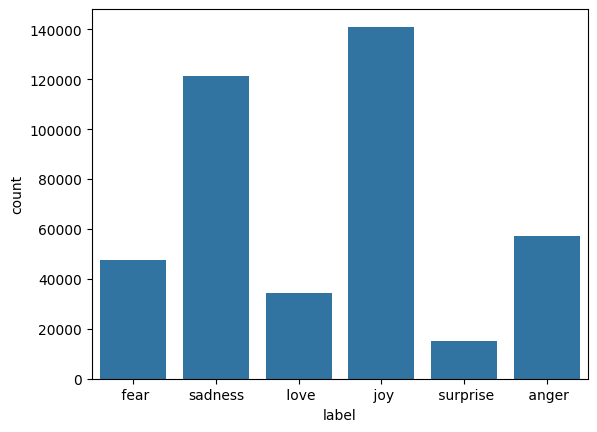

In [117]:
sns.countplot(x = base['label'])

# Tratamento de valores inconsistentes

# previsores e classe

In [118]:
x_base = base.iloc[:, 0:1 ].values
x_base

array([['i just feel really helpless and heavy hearted'],
       ['ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing'],
       ['i gave up my internship with the dmrg and am feeling distraught'],
       ...,
       ['i feel very curious be why previous early dawn in the time here don t you seek his trouble'],
       ['i feel that becuase of the tyranical nature of the government in el salvador and the savage social conditions of the general people that the set of thought to run the shoe shop in miguel marmols testimoney was able to work'],
       ['i think that after i had spent some time investigating the surroundings and things i started to feel more curious about other people']],
      dtype=object)

In [119]:
y_base = base.iloc[:,1:2 ].values
y_base

array([[' fear'],
       ['sadness'],
       [' fear'],
       ...,
       [' surprise'],
       [' anger'],
       [' surprise']], dtype=object)

# Conversão de atributos categóricos - Labelencoder

In [120]:
x_base[:,1:2]

array([], shape=(416809, 0), dtype=object)

In [123]:
label_RatingDesc = LabelEncoder()
label_QuestionDesc = LabelEncoder()
x_base[:,0] =label_RatingDesc.fit_transform(x_base[:,0])
x_base[:,0] =label_QuestionDesc.fit_transform(x_base[:,0])

In [ ]:
x_base

# Conversão de atributos categóricos - OneHotEncoder

In [102]:
onehot_veiculo = ColumnTransformer(transformers=[('OneHot',OneHotEncoder(), [0, -1])], remainder= 'passthrough')

In [103]:
x_base = onehot_veiculo.fit_transform(x_base)

In [104]:
x_base

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 833618 stored elements and shape (416809, 787644)>

# Escalonamento dos Valores

In [124]:
scale_base = StandardScaler()
x_base = scale_base.fit_transform(x_base)

In [125]:
x_base

array([[ 0.40156789],
       [ 1.68431517],
       [ 0.09169148],
       ...,
       [-0.01360821],
       [-0.1437998 ],
       [ 0.9732627 ]])

# Divisão de base em treinamento e teste

In [126]:
x_base_treinamento, x_base_teste, y_base_treinamento, y_base_teste = train_test_split(x_base, y_base, test_size= 0.20, random_state= 0)

In [127]:
x_base_treinamento.shape

(333447, 1)

# Salvar as variáveis

In [128]:
with open('base.pkl', mode= 'wb') as f:
  pickle.dump([x_base_treinamento,y_base_treinamento, x_base_teste, y_base_teste], f)